In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import sympy 
import random 
import math
from sklearn.metrics import mean_squared_error

In [2]:
#定義目標函數
def target_function(x):
    
    x = x%(2*math.pi)
    
    if x < math.pi:
        y = 1
    else:
        y = -1
    
    return y

In [3]:
#定義近似函數
def approximation_function(x,a,b,N):
    sum = 0
    for n in range(1,N+1):
        sum += a[n]*math.cos(n*x)+b[n]*math.sin(n*x)

    y = a[0] + sum
    return y

def E(y_train,y_predict):
    return (y_train - y_predict)**2/2

In [14]:
#初始化模型參數
N = 10
T = 2*math.pi
alpha = 0.01


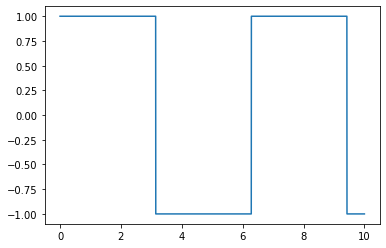

In [6]:
#繪製目標函數
x_train = []
x_train = np.linspace(0, 10, 10000)

y_train = [0 for _ in range(len(x_train))]
for i in range(len(x_train)):
    y_train[i] = target_function(x_train[i])

plt.plot(x_train,y_train)
plt.show()

In [7]:
#計算a.b之真值
a_true = [0 for _ in range(N+1)]
b_true = [0 for _ in range(N+1)]

for n in range(N):
    
    a_true[n] = 0 
    
    if n % 2 == 0:
        b_true[n] = 0
    else:
        b_true[n] = 4/n/math.pi

In [33]:
#training
def training(x_train,y_train,N,alpha):

    a = [0 for _ in range(N+1)]
    b = [0 for _ in range(N+1)]
    for time in range(10000):
        index = random.randint(0,len(x_train)-1)
        y_predict = approximation_function(x_train[index],a,b,N)

        #update
        for n in range(N+1):
            a[n] = a[n] + alpha * (y_train[index]-y_predict)*math.cos(n*x_train[index])
            b[n] = b[n] + alpha * (y_train[index]-y_predict)*math.sin(n*x_train[index])
            
    plt.plot(np.linspace(0,99999,100000),MSE_history)
    plt.show
    return a,b

In [9]:
#使用model計算y_predict
def predict(a,b,N):
    x_train = []
    x_train = np.linspace(0, 10, 10000)

    y_predict = [0 for _ in range(len(x_train))]
    for i in range(len(x_train)):
        y_predict[i] = approximation_function(x_train[i],a,b,N)
    
    return y_predict


In [34]:
#(b)
a,b = training(x_train,y_train,N,alpha)
y_predict = predict(a,b,N)


print("a_true= ",a_true)
print("b_true= ",b_true)
print("a_approx= ",a)
print("b_approx= ",b)
print("MSE=",mean_squared_error(y_predict,y_train))


KeyboardInterrupt: 

<function matplotlib.pyplot.show(*args, **kw)>

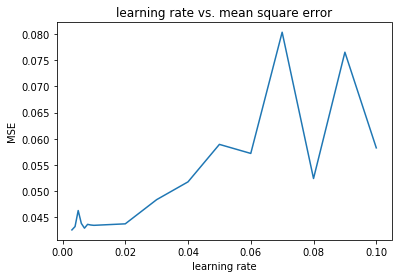

In [27]:
#(c)
MSE = [0,0]
for N in range(2,20):
    a,b = training(x_train,y_train,N,alpha)
    y_predict = predict(a,b,N)
    MSE.append(mean_squared_error(y_predict,y_train))
    if N%5 == 0:
        plt.plot(x_train,y_predict,label="N="+str(N))
        
plt.plot(x_train,y_train,label ="target")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

plt.plot(np.linspace(2,19,18),MSE[2:])
plt.xlabel('order N')
plt.ylabel('MSE')
plt.title("order N vs. mean square error")
plt.show


In [ ]:
#(d)
MSE = []
alpha_list = [0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.009,0.008,0.007,0.006,0.005,0.004,0.003]
for alpha in alpha_list:
    a,b = training(x_train,y_train,N,alpha)
    y_predict = predict(a,b,N)
    MSE.append(mean_squared_error(y_predict,y_train))

plt.plot(alpha_list,MSE)
plt.xlabel('learning rate')
plt.ylabel('MSE')
plt.title("learning rate vs. mean square error")
plt.show

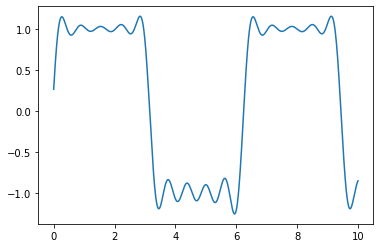

In [32]:
#(e)
#training
def batch_training(x_train,y_train,N,alpha):
    batch_size = 5
    a = [0 for _ in range(N+1)]
    b = [0 for _ in range(N+1)]
    for time in range(100000):
        update_a = [0 for _ in range(N+1)]
        update_b = [0 for _ in range(N+1)]
        for batch in range(batch_size):
            index = random.randint(0,len(x_train)-1)
            y_predict = approximation_function(x_train[index],a,b,N)
            for n in range(N+1):
                update_a[n] +=  (y_train[index]-y_predict)*math.cos(n*x_train[index])
                update_b[n] +=  (y_train[index]-y_predict)*math.sin(n*x_train[index])
        #update
        for n in range(N+1):
            a[n] = a[n] + alpha * update_a[n]
            b[n] = b[n] + alpha * update_b[n]   
    return a,b

a,b = batch_training(x_train,y_train,N,alpha)
y_predict = predict(a,b,N)
plt.plot(x_train,y_predict)
plt.show()